In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')

In [4]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
data.columns.tolist()

['Crop',
 'Crop_Year',
 'Season',
 'State',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield']

In [7]:
# Data preparation & feature extraction process

In [8]:
# Checking for missing values
print(data.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [9]:
# We want to predict the market trends for a specific crop in India throughout the year

In [10]:
data.columns.tolist()

['Crop',
 'Crop_Year',
 'Season',
 'State',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield']

In [11]:
# Count the distinct number of crops in the dataset
number_of_crops = data['Crop'].nunique()
number_of_crops

55

In [12]:
# Print the distinct number of crops in the dataset
distinct_crops = data['Crop'].unique()
print(distinct_crops)

['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']


In [13]:
# Count the distinct number of seasons in the dataset
number_of_seasons = data['Season'].nunique()
number_of_seasons

6

In [14]:
# Print the distinct number of seasons in the dataset
distinct_seasons = data['Season'].unique()
print(distinct_seasons)

['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']


In [15]:
# Count the distinct number of states in the dataset
number_of_states = data['State'].nunique()
number_of_states

30

In [16]:
# Print the distinct number of states in the dataset
distinct_states = data['State'].unique()
print(distinct_states)

['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']


In [17]:
# Separating the categorical and quantitative variables
numeric_data = data.select_dtypes(include = np.number)
non_numericdata = data.select_dtypes(include = ['object'])

In [18]:
numeric_data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,1997,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,1997,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [19]:
non_numericdata

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(lint),Kharif,Assam
...,...,...,...
19684,Small millets,Kharif,Nagaland
19685,Wheat,Rabi,Nagaland
19686,Maize,Kharif,Jammu and Kashmir
19687,Rice,Kharif,Jammu and Kashmir


In [20]:
# Scaling
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

In [21]:
# Convert the scaled data back to a DataFrame
scaled_numeric_data_df = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)
scaled_numeric_data_df

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,-1.866375,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,-1.866375,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,-1.866375,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,-1.866375,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,-1.866375,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555
...,...,...,...,...,...,...,...
19684,-1.712480,-0.240071,-0.062475,0.073749,-0.249707,-0.223593,-0.090465
19685,-1.712480,-0.244165,-0.062471,0.073749,-0.252829,-0.227672,-0.087619
19686,-1.866375,0.178704,-0.060806,-0.099836,0.057755,0.222829,-0.089571
19687,-1.866375,0.130756,-0.062461,-0.099836,0.022534,0.171758,-0.091015


In [22]:
# Encoding the categorical features using label encoding
encoded_data = pd.get_dummies(data, columns=['Crop', 'Season', 'State'])

# Encoding the categorical features using Label Encoding
label_encoders = {}

for i in non_numericdata.columns:
    # Convert the columns to strings before encoding
    data[i] = data[i].astype(str)  # Ensure all values are strings
    label_encoders[i] = LabelEncoder()
    data[i] = label_encoders[i].fit_transform(data[i])

In [23]:
encoded_data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19686,1997,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19687,1997,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
non_numericdata_df = pd.DataFrame(non_numericdata, columns=non_numericdata.columns)

In [25]:
encoded_non_numeric_data = data[non_numericdata_df.columns]

In [26]:
# Reset indexes to ensure alignment
scaled_numeric_data_df.reset_index(drop=True, inplace=True)
encoded_non_numeric_data.reset_index(drop=True, inplace=True)

In [27]:
# Creating a dataframe that contains both the numeric and non numeric variables
new_data = pd.concat([scaled_numeric_data_df, encoded_non_numeric_data], axis=1)
new_data.columns.tolist()

['Crop_Year',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield',
 'Crop',
 'Season',
 'State']

In [28]:
new_data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop,Season,State
0,-1.866375,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128,0,4,2
1,-1.866375,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225,1,1,2
2,-1.866375,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763,8,1,2
3,-1.866375,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928,9,4,2
4,-1.866375,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555,11,1,2
...,...,...,...,...,...,...,...,...,...,...
19684,-1.712480,-0.240071,-0.062475,0.073749,-0.249707,-0.223593,-0.090465,44,1,19
19685,-1.712480,-0.244165,-0.062471,0.073749,-0.252829,-0.227672,-0.087619,53,2,19
19686,-1.866375,0.178704,-0.060806,-0.099836,0.057755,0.222829,-0.089571,24,1,10
19687,-1.866375,0.130756,-0.062461,-0.099836,0.022534,0.171758,-0.091015,40,1,10


In [29]:
# Calculating the correlation matrix for the numerical features
correlation_matrix = new_data.corr()

# Displaying the correlation matrix
correlation_matrix

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop,Season,State
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539,0.010933,-0.053790,0.035491
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858,0.071105,-0.031369,0.026989
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809,-0.075893,0.096856,0.003917
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761,0.033462,0.099357,0.083953
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862,0.074676,-0.031800,0.026947
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782,0.066409,-0.030598,0.027629
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000,-0.110894,0.141791,0.009668
Crop,0.010933,0.071105,-0.075893,0.033462,0.074676,0.066409,-0.110894,1.000000,0.037492,0.038587
Season,-0.053790,-0.031369,0.096856,0.099357,-0.031800,-0.030598,0.141791,0.037492,1.000000,-0.036625
State,0.035491,0.026989,0.003917,0.083953,0.026947,0.027629,0.009668,0.038587,-0.036625,1.000000


In [30]:
# We want to check which features are highly correlated with yield

# Extract correlations with Production
yield_corr = correlation_matrix['Yield']

# Sort the correlations in descending order
sorted_yield_corr = yield_corr.sort_values(ascending=False)

# Print correlations with Production
print("\nCorrelations with Yield:")
print(sorted_yield_corr)


Correlations with Yield:
Yield              1.000000
Production         0.570809
Season             0.141791
Annual_Rainfall    0.020761
State              0.009668
Fertilizer         0.002862
Crop_Year          0.002539
Area               0.001858
Pesticide          0.001782
Crop              -0.110894
Name: Yield, dtype: float64


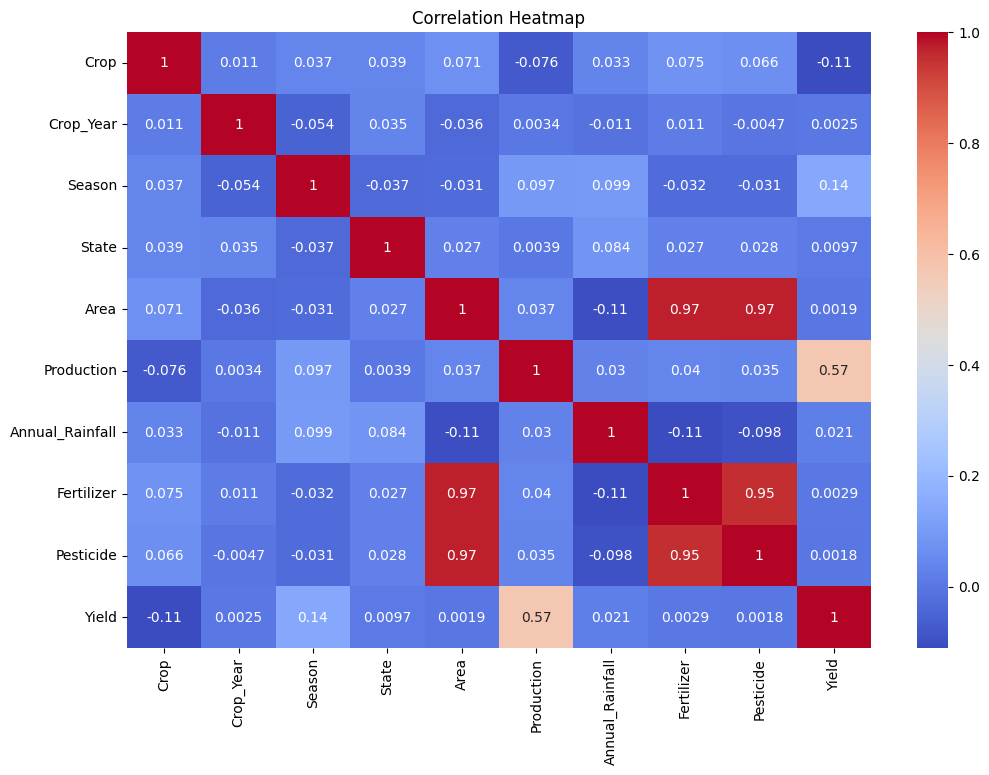

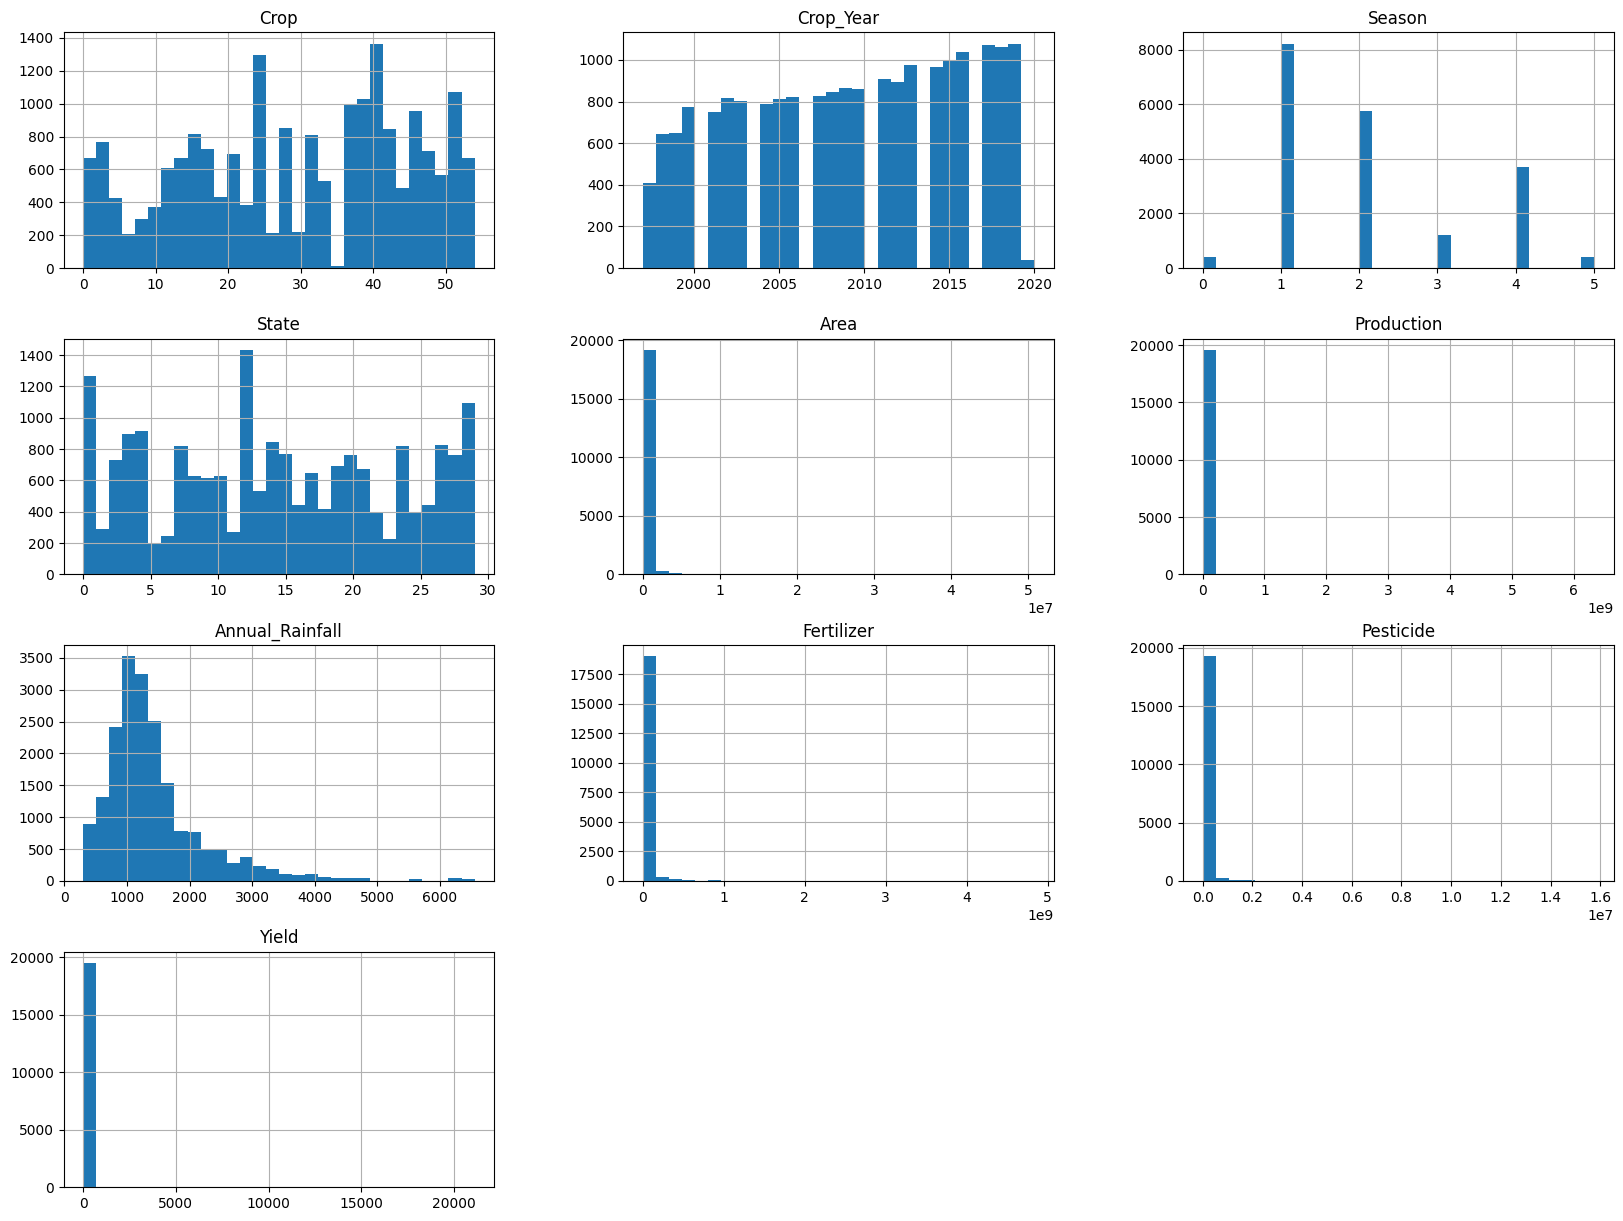

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [33]:
# Feature Selection Using Random Forest
# We first used Random Forest because of its ability to handle non-linear relationships and its robustness to overfitting due to averaging multiple trees.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Separating the features and target variable (here 'Yield' is what we want to predict so that is the target)
X = new_data.drop(columns=['Yield'])
y = new_data['Yield']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
print(feature_importance_df)

MSE: 0.09877581760901587
RMSE: 0.31428620333863827
MAE: 0.012901257579852169
R-squared: 0.9049049490320139
           Feature  Importance
2       Production    0.719150
1             Area    0.103608
5        Pesticide    0.056157
8            State    0.038580
4       Fertilizer    0.038011
6             Crop    0.023167
3  Annual_Rainfall    0.013672
0        Crop_Year    0.005533
7           Season    0.002121


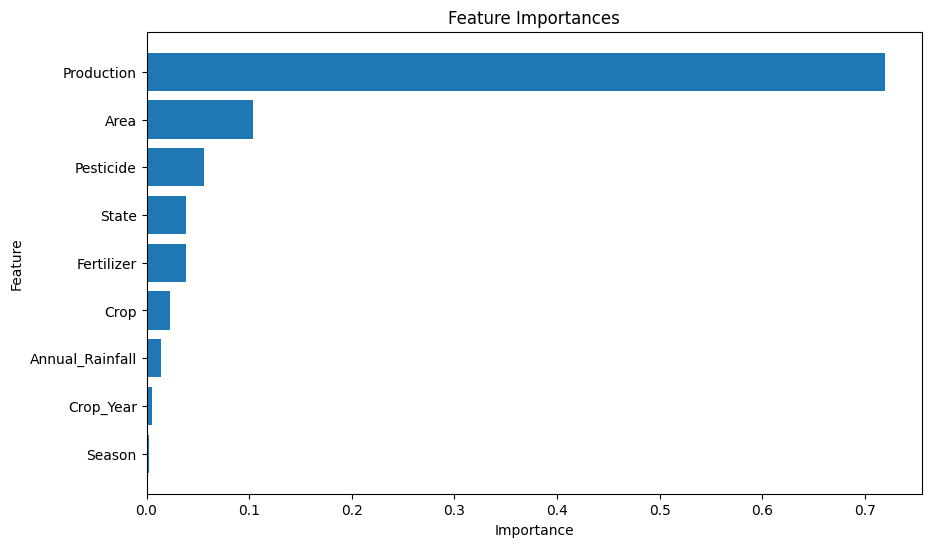

In [34]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [36]:
# Finetuning
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Grid search with a reduced number of parallel jobs
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5, n_jobs=2, scoring='neg_mean_squared_error')

rf_grid_search.fit(X, y)
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

# Get the best hyperparameters
best_params = rf_grid_search.best_params_
best_model = rf_grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics for the best model
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.007162491147755569
RMSE: 0.08463150210031468
MAE: 0.003998919123869779
R-squared: 0.9931044108037695


In [48]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the data (assumed to be in a DataFrame called 'data')
data = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')
data['Date'] = pd.to_datetime(data['Crop_Year'], format='%Y')
data.set_index('Date', inplace=True)
data['Yield'] = data['Yield'].astype(float)

# Assuming 'Yield' is the target variable and other columns are features
features = data.drop(columns=['Yield'])
target = data['Yield']

# Encoding categorical features (if any)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting the target to numpy array
target = target.values

# Function to reshape data for LSTM
def reshape_data(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5  # Number of previous time steps to use for prediction
X_reshaped, y_reshaped = reshape_data(scaled_features, target, time_steps)

# Splitting the data into training and testing sets
train_size = int(X_reshaped.shape[0] * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y_reshaped[:train_size], y_reshaped[train_size:]

# Define the model creation function
def create_model(optimizer='adam', units=128, activation='relu', dropout_rate=0.0):
    model = keras.Sequential([
        keras.layers.LSTM(units, activation=activation, input_shape=(X_train.shape[1], X_train.shape[2])),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
param_grid = {
    'optimizer': ['adam'],
    'units': [50, 100],
    'activation': ['relu'],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Manual Grid Search
best_mae = float('inf')
best_model = None
best_params = {}

for optimizer in param_grid['optimizer']:
    for units in param_grid['units']:
        for activation in param_grid['activation']:
            for dropout_rate in param_grid['dropout_rate']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        print(f"Training with {optimizer=}, {units=}, {activation=}, {dropout_rate=}, {batch_size=}, {epochs=}")
                        model = create_model(optimizer, units, activation, dropout_rate)
                        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
                        loss, mae = model.evaluate(X_test, y_test, verbose=0)

                        if mae < best_mae:
                            best_mae = mae
                            best_model = model
                            best_params = {
                                'optimizer': optimizer,
                                'units': units,
                                'activation': activation,
                                'dropout_rate': dropout_rate,
                                'batch_size': batch_size,
                                'epochs': epochs
                            }

# Display best model's parameters
print(f"Best MAE: {best_mae}")
print(f"Best Parameters: {best_params}")

# Save the best model
best_model.save('best_lstm_model.h5')

Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.0, batch_size=16, epochs=50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.0, batch_size=16, epochs=100
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.0, batch_size=32, epochs=50
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.0, batch_size=32, epochs=100
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.2, batch_size=16, epochs=50
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.2, batch_size=16, epochs=100
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.2, batch_size=32, epochs=50
Training with optimizer='adam', units=50, activation='relu', dropout_rate=0.2, batch_size=32, epochs=100
Training with optimizer='adam', units=100, activation='relu', dropout_rate=0.0, batch_size=16, epochs=50
Training with optimizer='adam', units=100, activation='relu', dropout_rate=0.0, batch_size=16, epochs=100
Training with optimizer='adam', units=100, activation='re

Best MAE: 52.807533264160156
Best Parameters: {'optimizer': 'adam', 'units': 100, 'activation': 'relu', 'dropout_rate': 0.2, 'batch_size': 16, 'epochs': 100}
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 434805.07860974304
Mean Absolute Error: 52.80754623626636


In [49]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Squared Error: 434805.07860974304
Mean Absolute Error: 52.80754623626636
R-squared: -0.23276894478098775


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1372 - mae: 0.4350 - val_loss: 0.6527 - val_mae: 0.1820
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5644 - mae: 0.2154 - val_loss: 0.4870 - val_mae: 0.1373
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5653 - mae: 0.2141 - val_loss: 0.4223 - val_mae: 0.2444
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3414 - mae: 0.1854 - val_loss: 0.2927 - val_mae: 0.1794
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2930 - mae: 0.1816 - val_loss: 0.2013 - val_mae: 0.1378
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3102 - mae: 0.1833 - val_loss: 0.1545 - val_mae: 0.0989
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1899 - mae: 0.1236 - val_loss: 0.1579 - val_mae: 0.1845
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2507 - mae: 0.1216 - val_loss: 0.1169 - val_mae: 0.0797
Epoch 9/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

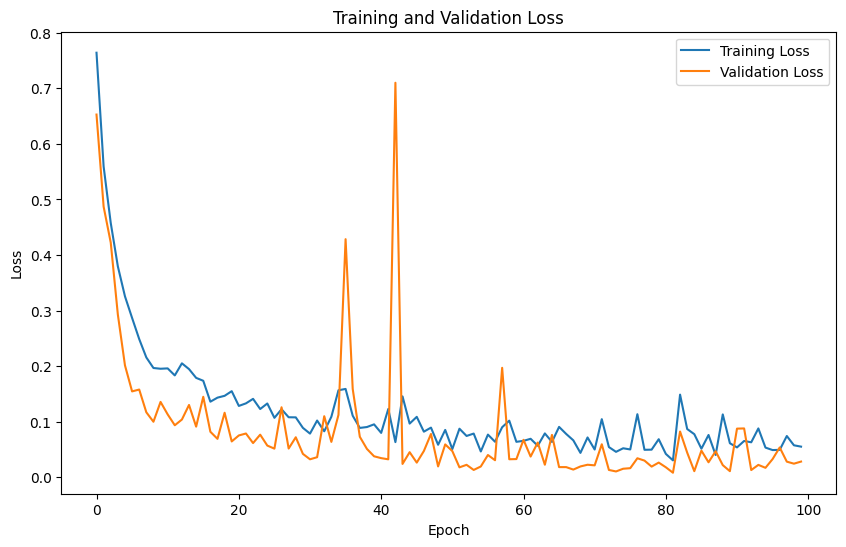

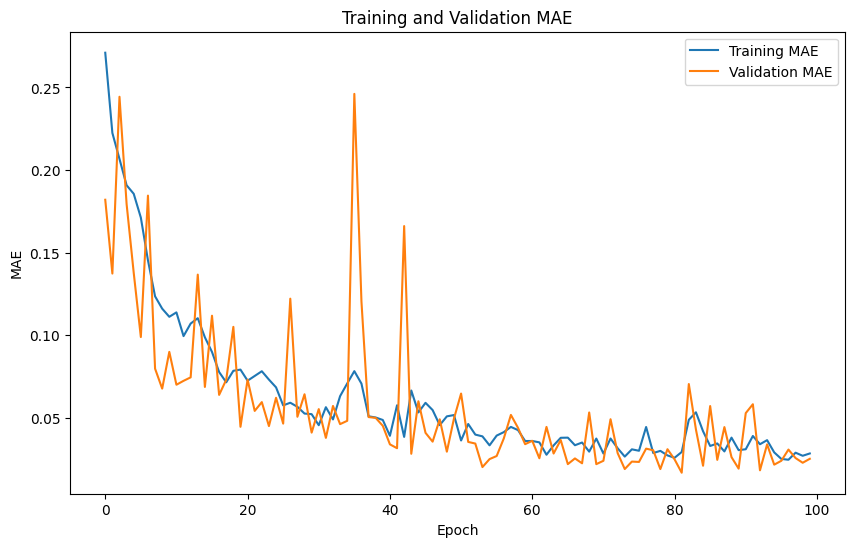

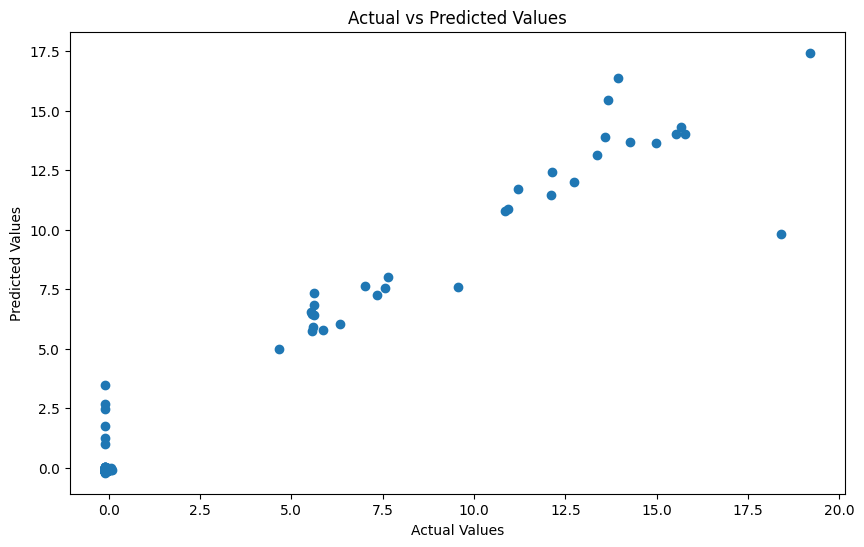

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.0032 - mae: 0.1984 - val_loss: 1.2511 - val_mae: 0.2080
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7463 - mae: 0.1579 - val_loss: 1.1444 - val_mae: 0.1595
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.7570 - mae: 0.1566 - val_loss: 0.9903 - val_mae: 0.1648
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.6665 - mae: 0.1463 - val_loss: 0.9955 - val_mae: 0.1386
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.6402 - mae: 0.1277 - val_loss: 0.9124 - val_mae: 0.1405
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.4782 - mae: 0.1176 - val_loss: 0.7717 - val_mae: 0.1875
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.5639 - mae: 0.1364 - val_loss: 0.8154 - val_mae: 0.1556
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4277 - mae: 0.1213 - val_loss: 0.7902 - val_mae: 0.1665
Epoch 9/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - l

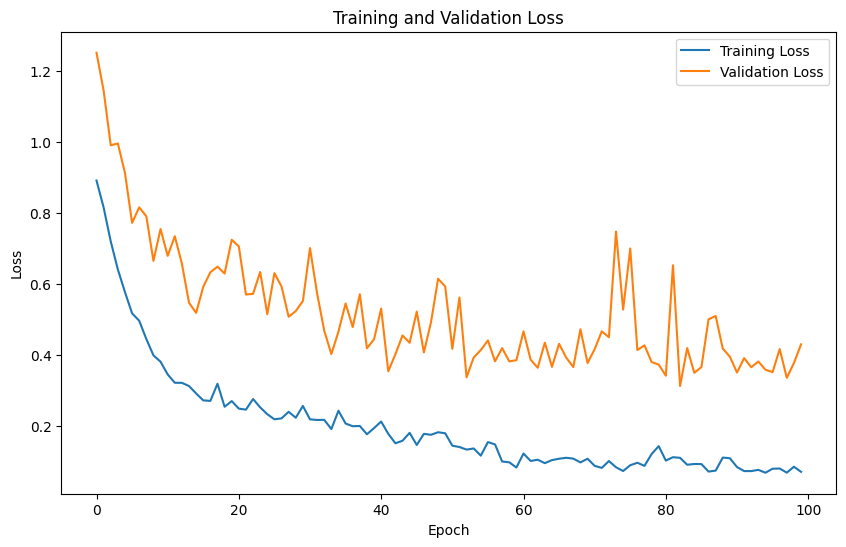

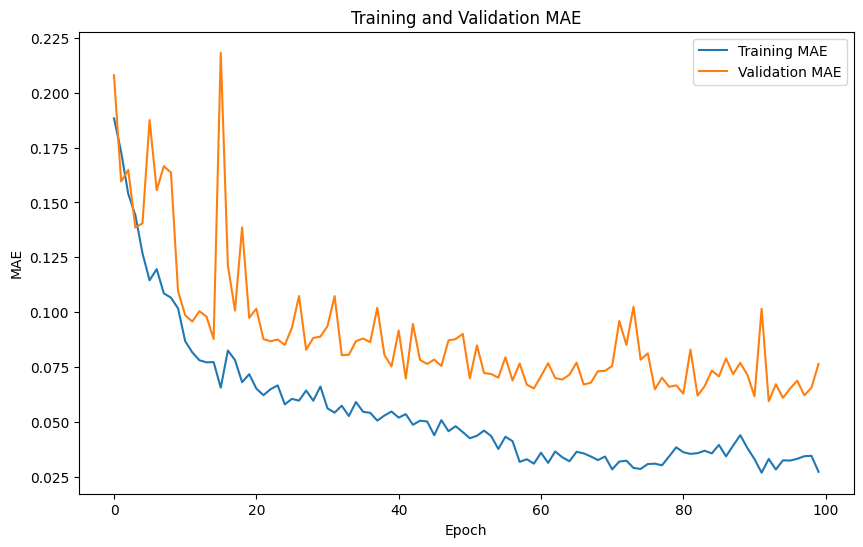

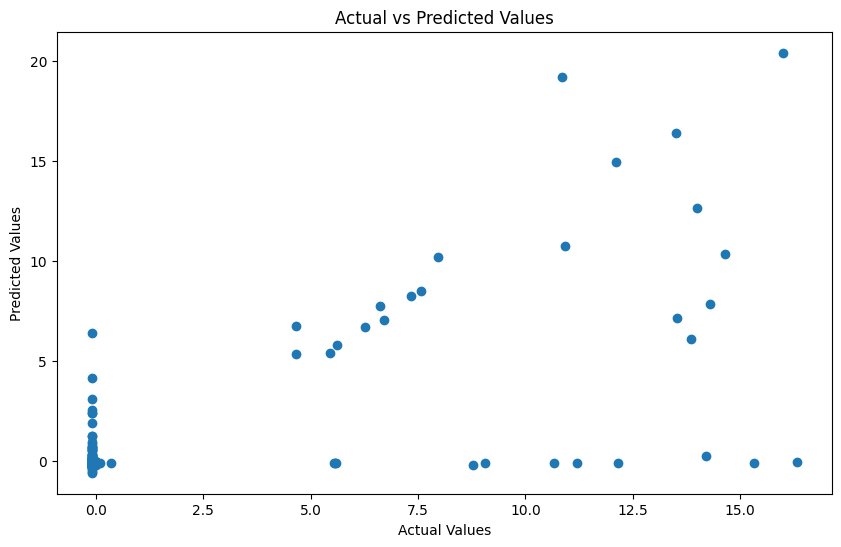

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Reshape data to 3D array for time series
def reshape_data(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5  # Number of time steps to consider
X_reshaped, y_reshaped = reshape_data(X_scaled_df, y, time_steps)

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Ensure the target is reshaped properly
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# LSTM was also chosen for its ability to model sequential data and capture temporal dependencies.

# Define the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# XGBoost
# We used this too for its efficiency and performance in handling large datasets and its ability to capture complex patterns.
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.11990690108169107
Mean Absolute Error: 0.01701088866779278
R-squared: 0.8845612909537092


Crop_Year
1997-01-01         NaN
1998-01-01   -0.446087
1999-01-01    0.396087
2000-01-01    2.033913
2001-01-01   -1.070000
Name: y, dtype: float64
SARIMA Evaluation Metrics:
MSE: 19.881615405181556
RMSE: 4.458880510305423
MAE: 3.2333
R-squared: -0.8294084716651173


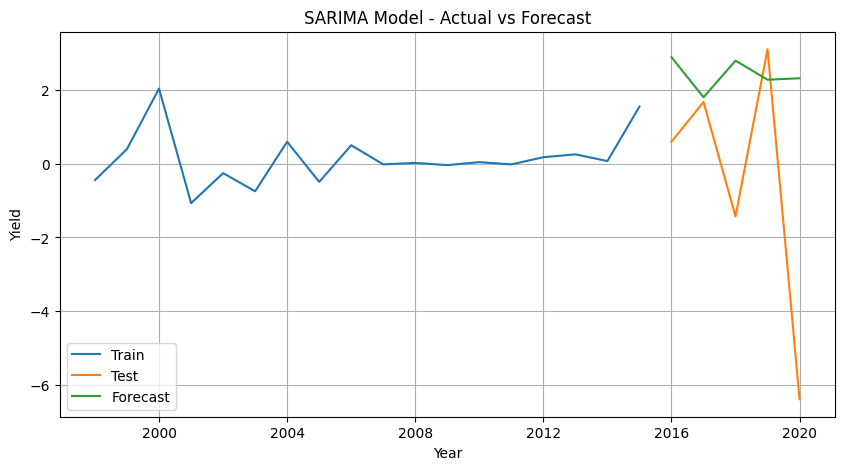

In [ ]:
# SARIMA. Since we are dealing with time series data, particularly in capturing seasonality and trends. This was suitable.
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (assuming it's already available as `data`)
data.index = pd.to_datetime(data.index)  # Ensure the index is datetime

# Verify 'Yield' column exists and contains the expected data
print(data['y'].head())

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Define the SARIMA model configuration (revised for experimentation)
order = (2, 1, 2)
seasonal_order = (2, 1, 1, 12)  # Assuming annual seasonality

# Fit the SARIMA model
sarima_model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# Forecast and predict
start = len(train)
end = len(train) + len(test) - 1
forecast = sarima_results.predict(start=start, end=end, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test['y'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast)
r2 = r2_score(test['y'], forecast)

# Print the evaluation metrics
print("SARIMA Evaluation Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['y'], label='Train')
plt.plot(test.index, test['y'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Model - Actual vs Forecast')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Save the rf model as a pickle file
import joblib

# Random Forest was the best model
joblib.dump(best_model, 'best_random_forest_model_new.pkl')

['best_random_forest_model_new.pkl']

In [54]:
from google.colab import files

# Download the model file
files.download('best_random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>